In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('wine.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

# EDA

In [3]:
df.shape

(1599, 12)

Dataset has 1599 rows and 12 rows including the label

In [4]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

There are no constant columns as well as there are no categorical data except for the label

In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

All the features are of float type and class label is of integer type

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values in the dataset

In [7]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Dataset is highly imbalanced

In [8]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

No null values as count equals to 1599 in each column. Variance is close to zero in almost all columns except for 'total sulfur dioxide' which has very high variance. Mean is almost equal to median or slightly higher than the median, therefore data follows gaussian distribution. There are some outliers present as there is high difference between interquartile ranges and min/max values of some column, we will look it into detail.

### Univariate Analysis

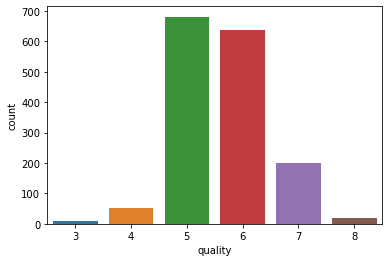

In [9]:
sns.countplot(df['quality'])

Data is imbalanced, there is more qualities of 5 and 6 wines than all others

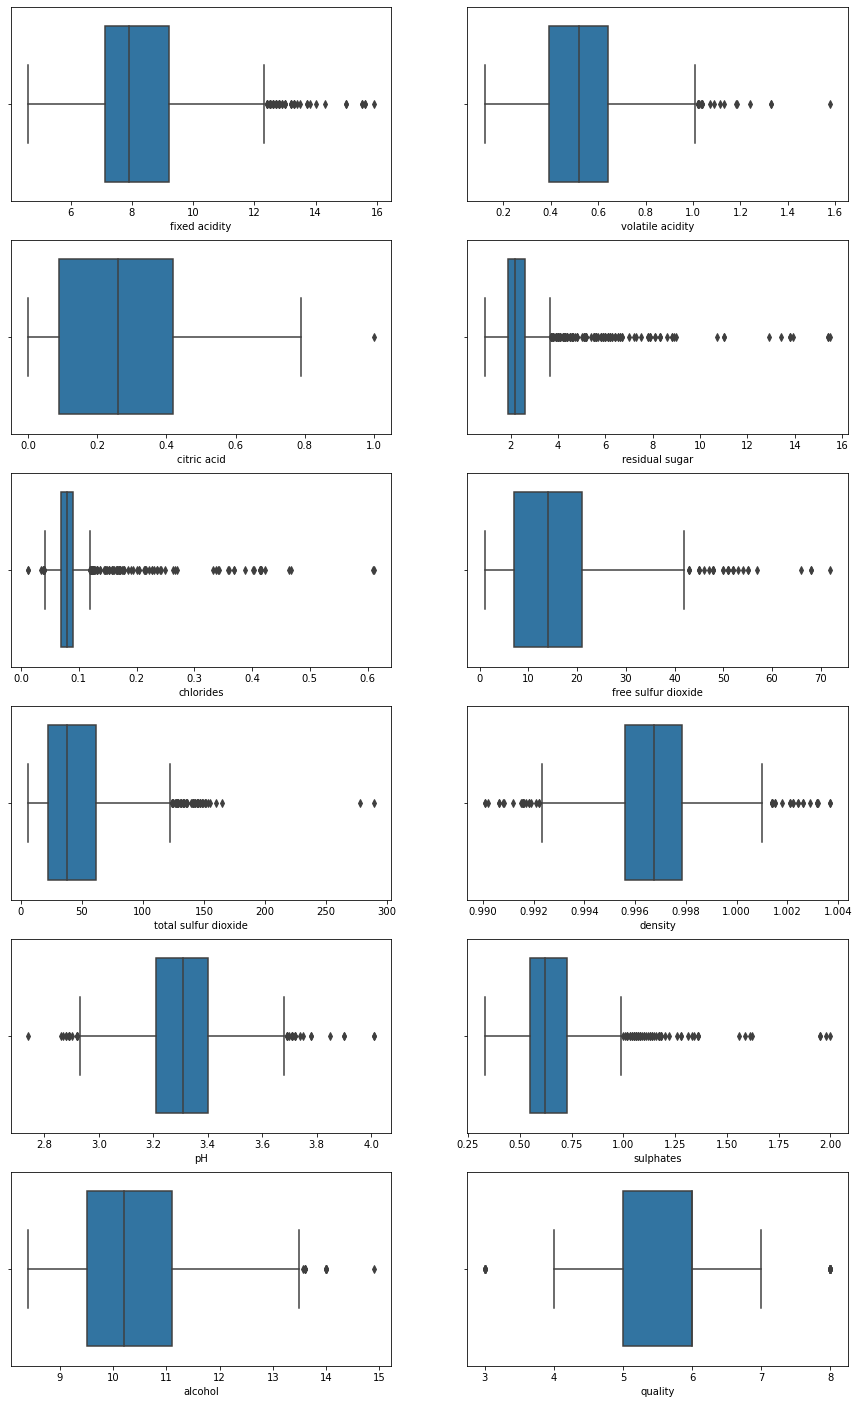

In [10]:
col=df.columns
fig,ax=plt.subplots(6,2,figsize=(15,25))
r=0
c=0
for i,n in enumerate(col):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.boxplot(df[n],ax=ax[r,c])
    c+=1

There are outliers present in almost all the columns.

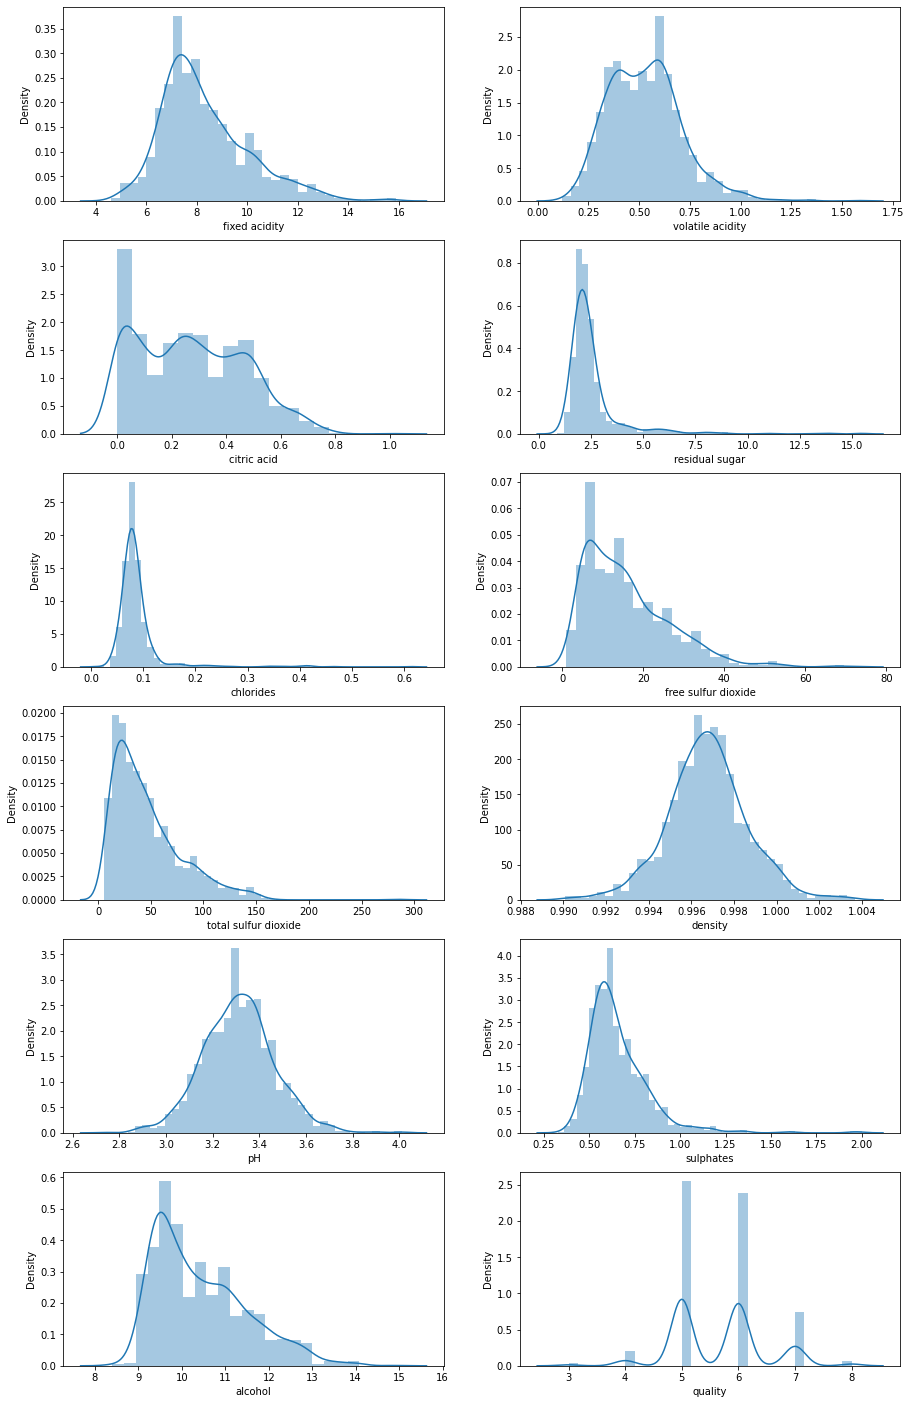

In [11]:
col=df.columns
fig,ax=plt.subplots(6,2,figsize=(15,25))
r=0
c=0
for i,n in enumerate(col):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.distplot(df[n],ax=ax[r,c])
    c+=1

Data is normally distributed pH and density column, rest of the data is somewhat skewed towards right.

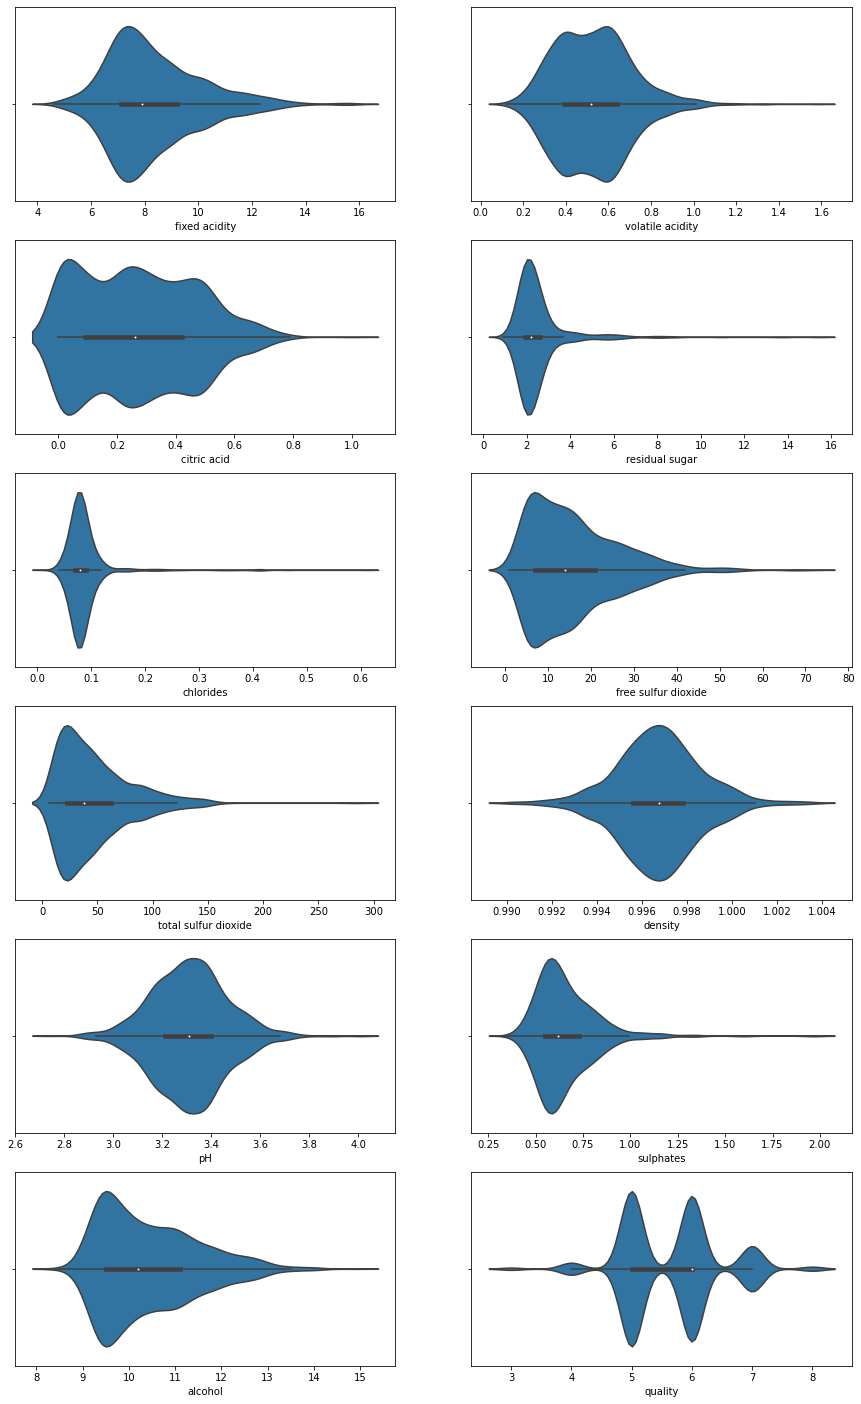

In [12]:
col=df.columns
fig,ax=plt.subplots(6,2,figsize=(15,25))
r=0
c=0
for i,n in enumerate(col):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.violinplot(df[n],ax=ax[r,c])
    c+=1

There are more than 1 value in citric acid, volatile acidity and quality where the density of values is maximum, rest all the features have maximum density only at a single point with presence of outliers in both the cases

### Bivariate Analysis

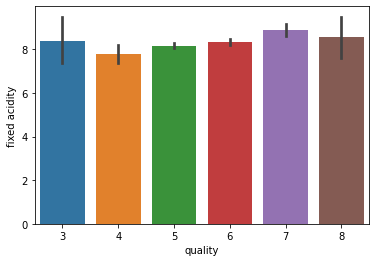

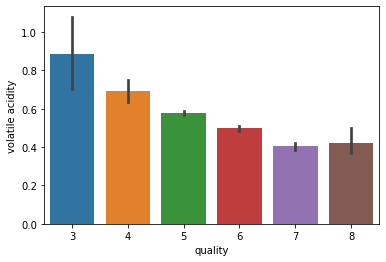

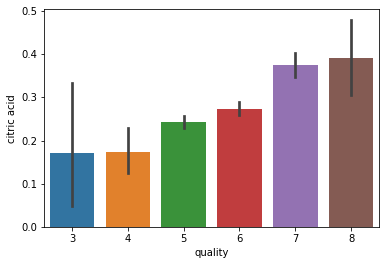

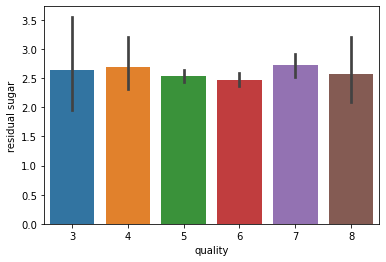

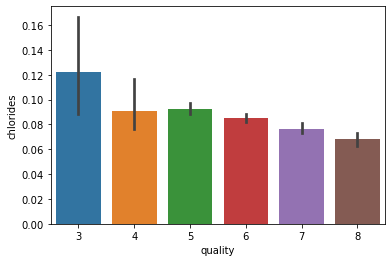

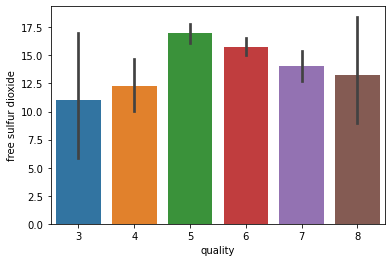

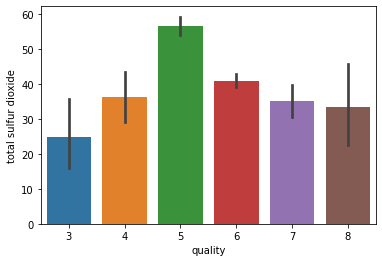

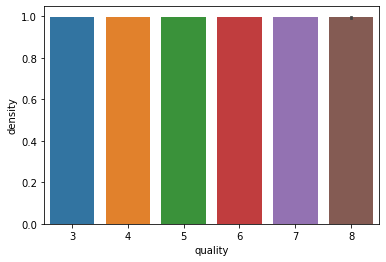

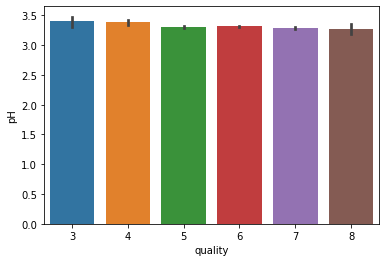

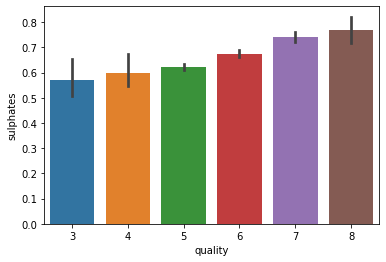

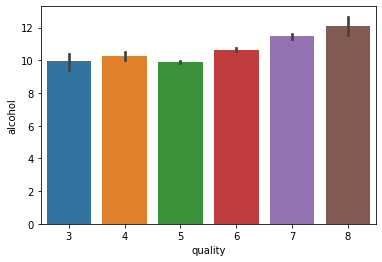

<Figure size 432x288 with 0 Axes>

In [13]:
for i in df.columns:
    if i!='quality':
        sns.barplot(x=df['quality'],y=df[i])
        plt.figure()

As the sulphates,citric acid and alcohol content in a wine increases, wine quality increases. While chlorides and volatile acidity decreases the wine quality. Density does not seem to affect the wine quality.

In [14]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

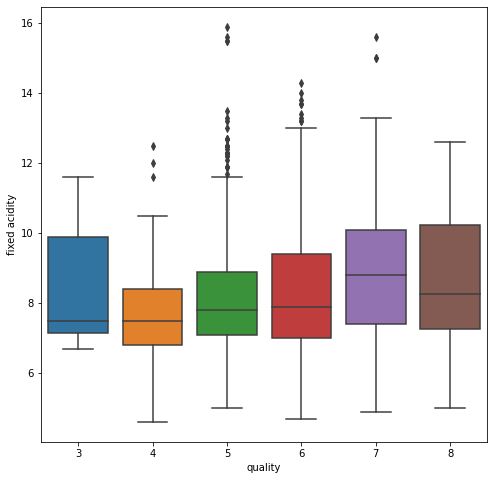

In [15]:
plt.figure(figsize=(8,8))
sns.boxplot(x=df['quality'],y=df['fixed acidity'])

All the types of wine quality have almost same value for fixed acidity even though there minimum and maximum vary and outliers are also present

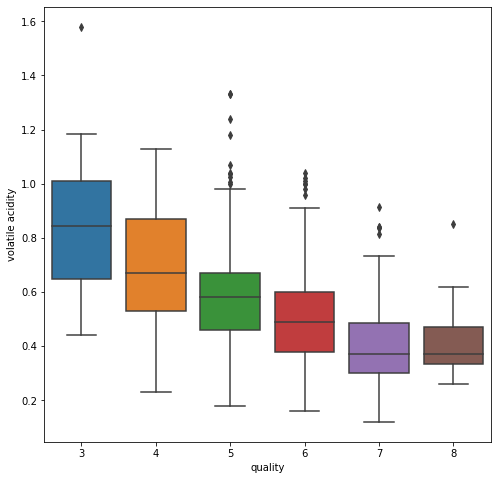

In [16]:
plt.figure(figsize=(8,8))
sns.boxplot(x=df['quality'],y=df['volatile acidity'])

In higher quality of wine volatile acidity is minimum and 7 and type of wine have same median for volatile acidity

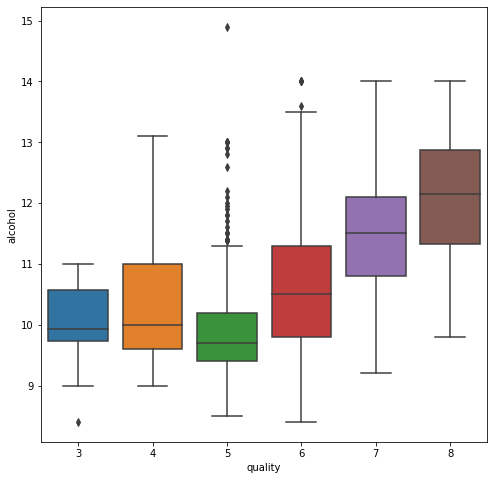

In [17]:
plt.figure(figsize=(8,8))
sns.boxplot(x=df['quality'],y=df['alcohol'])

There is more alcohol present in higher quality of wines but it also have low quatities of alcohol as their minimum is quite low

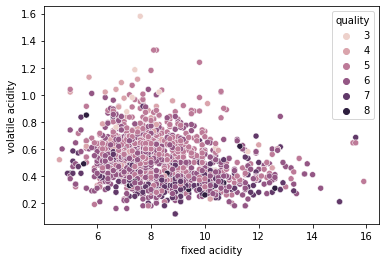

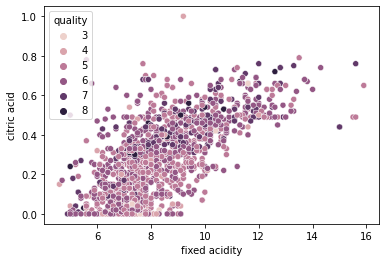

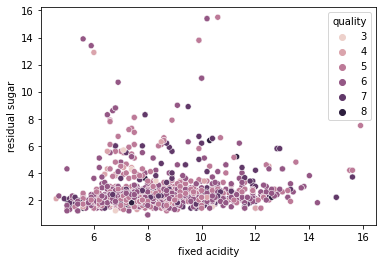

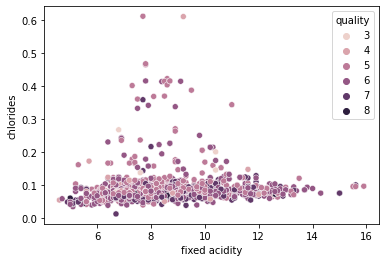

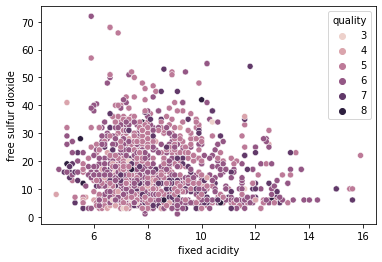

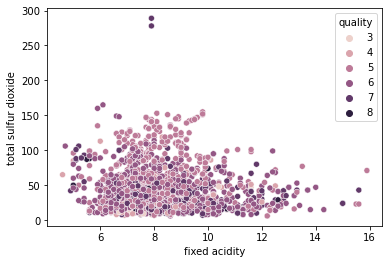

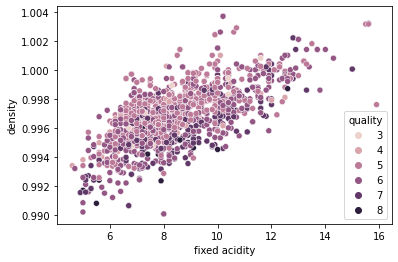

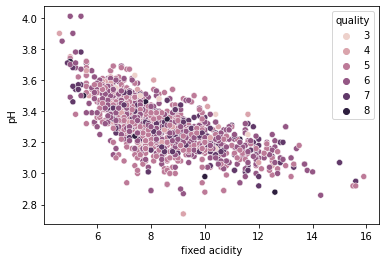

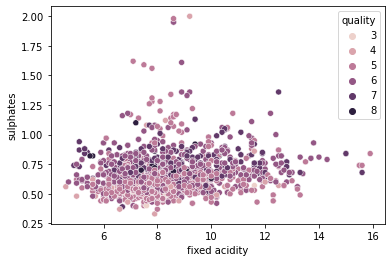

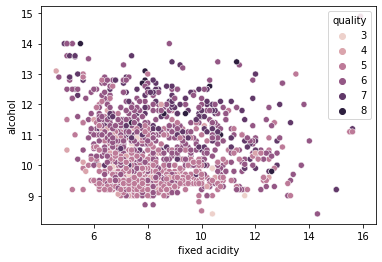

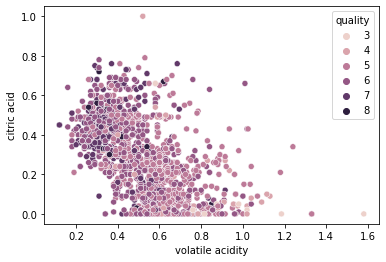

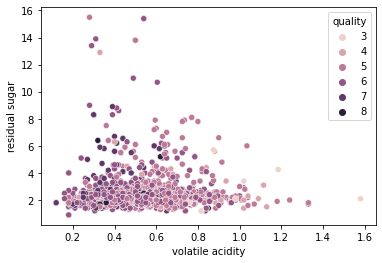

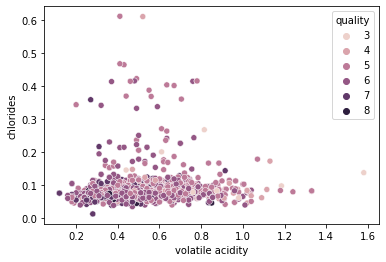

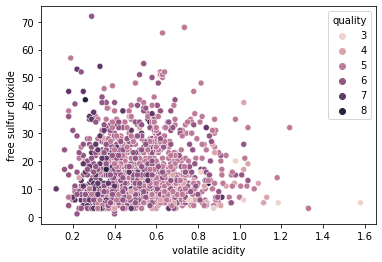

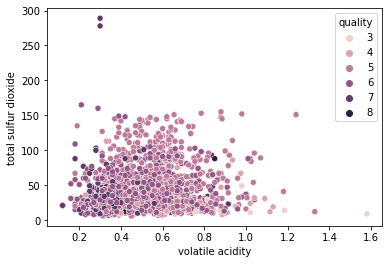

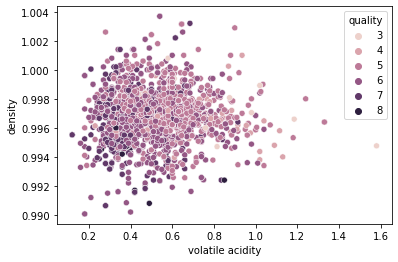

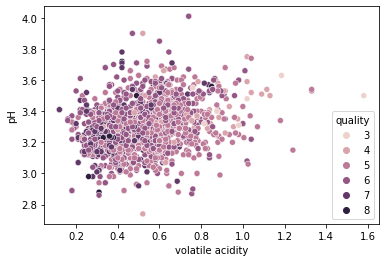

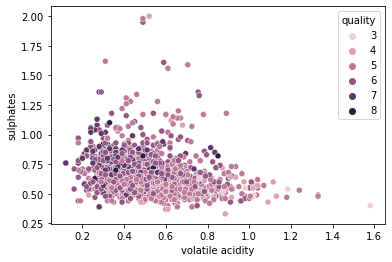

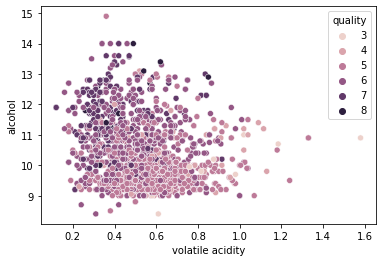

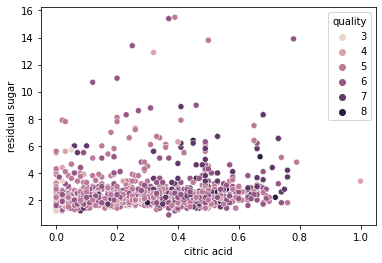

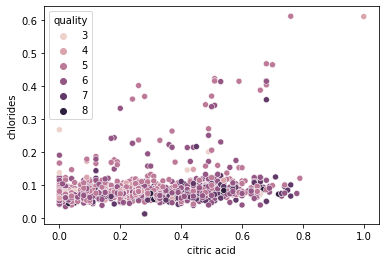

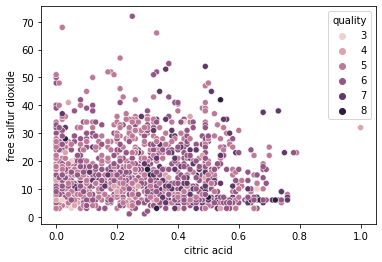

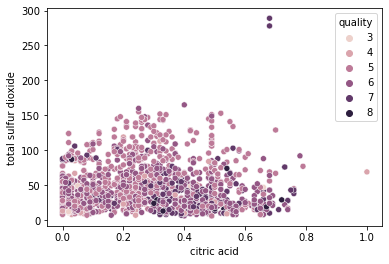

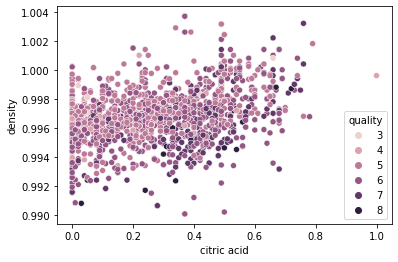

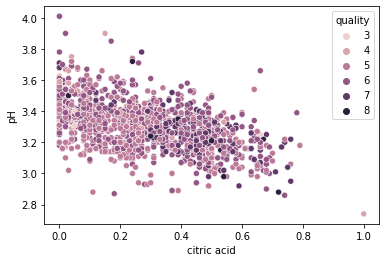

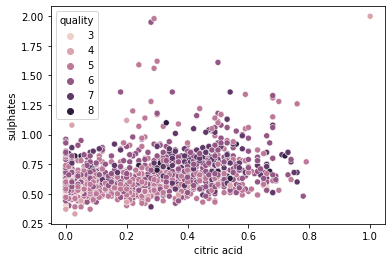

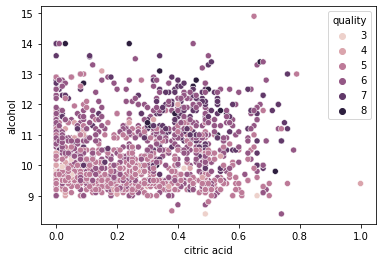

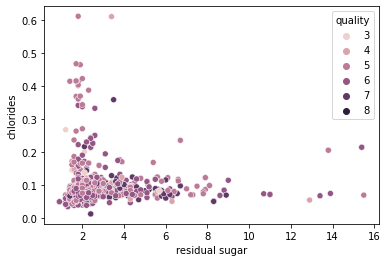

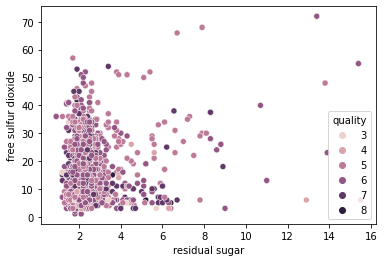

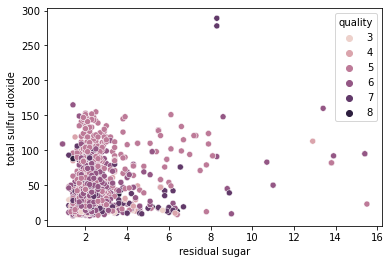

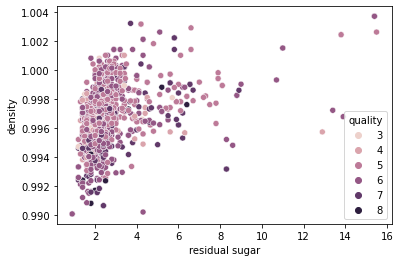

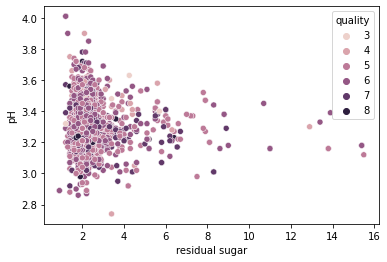

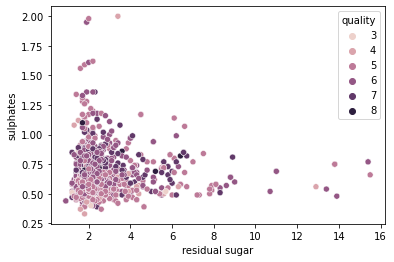

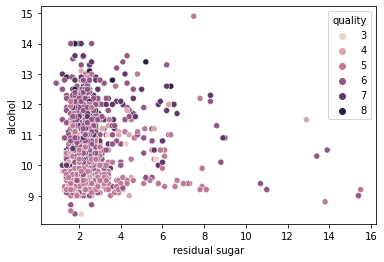

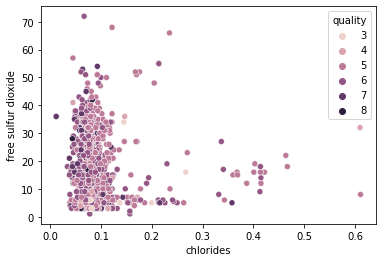

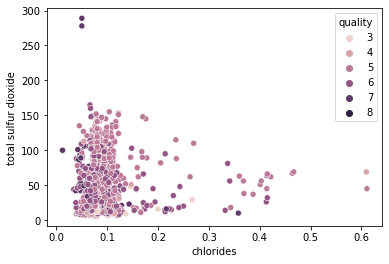

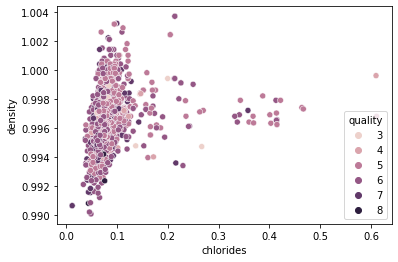

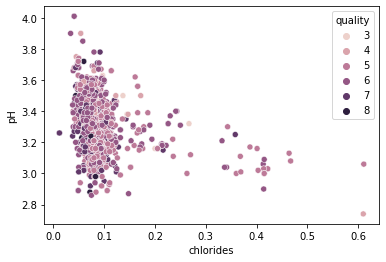

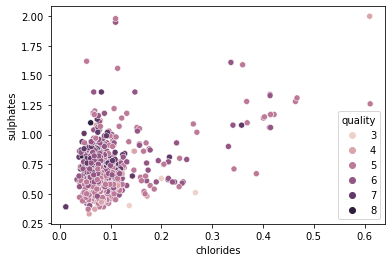

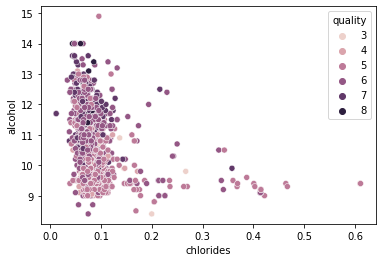

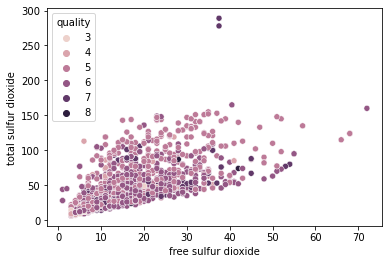

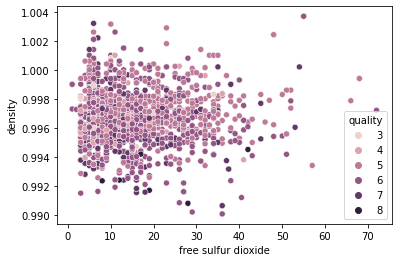

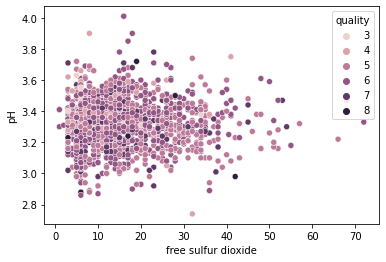

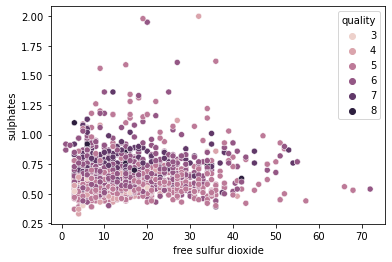

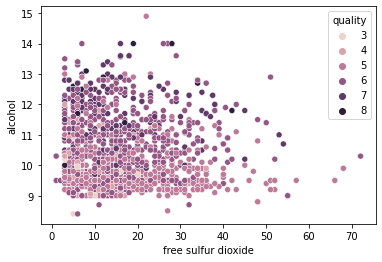

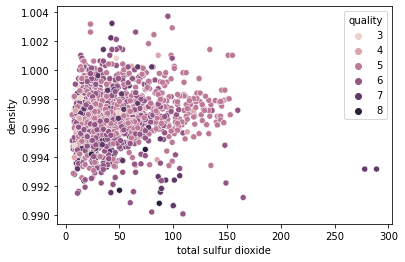

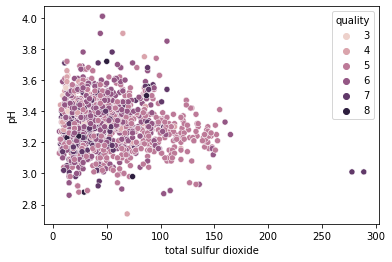

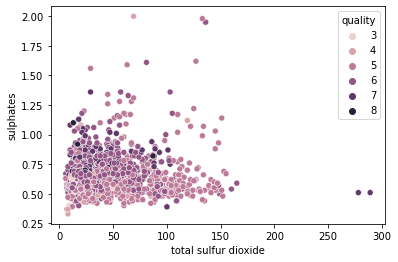

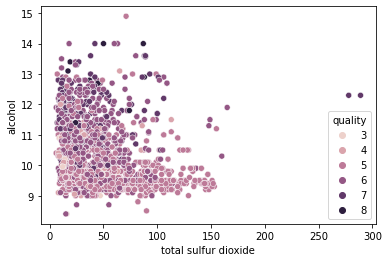

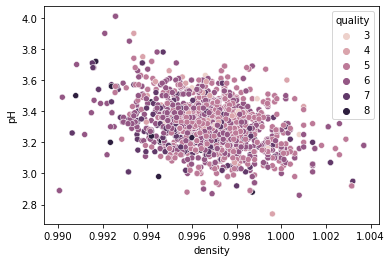

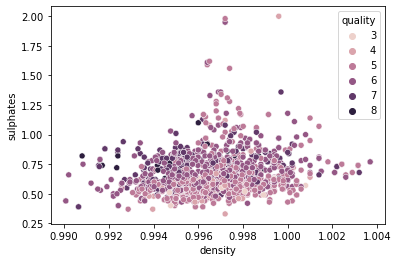

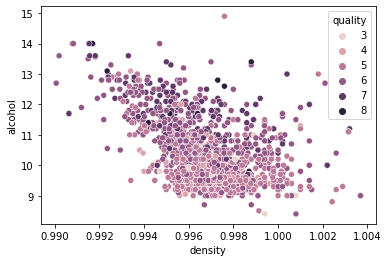

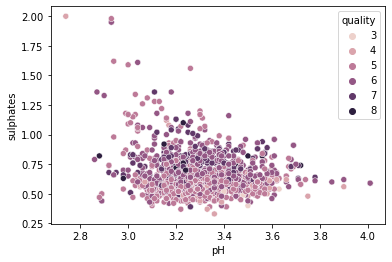

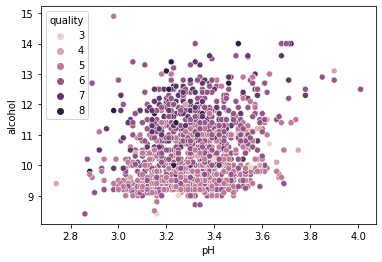

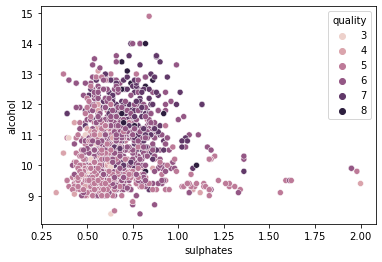

<Figure size 432x288 with 0 Axes>

In [18]:
for i in range(len(df.columns)-1):
    for j in range(i+1,len(df.columns)-1):
        sns.scatterplot(x=df[df.columns[i]],y=df[df.columns[j]],hue=df['quality'])
        plt.figure()

As the value of citric acid increases so does fixed acidity,density and ph decreases. High alcohol levels always show high quality of wines whereas volatile acidity, sulphur dioxide decreases it. There is not much linear relation between the dependent features except for few as mentioned earlier. Apart from alcohol content and volatile acidity, no other feature can alone decide the quality of wine.


### Multivariate Analysis

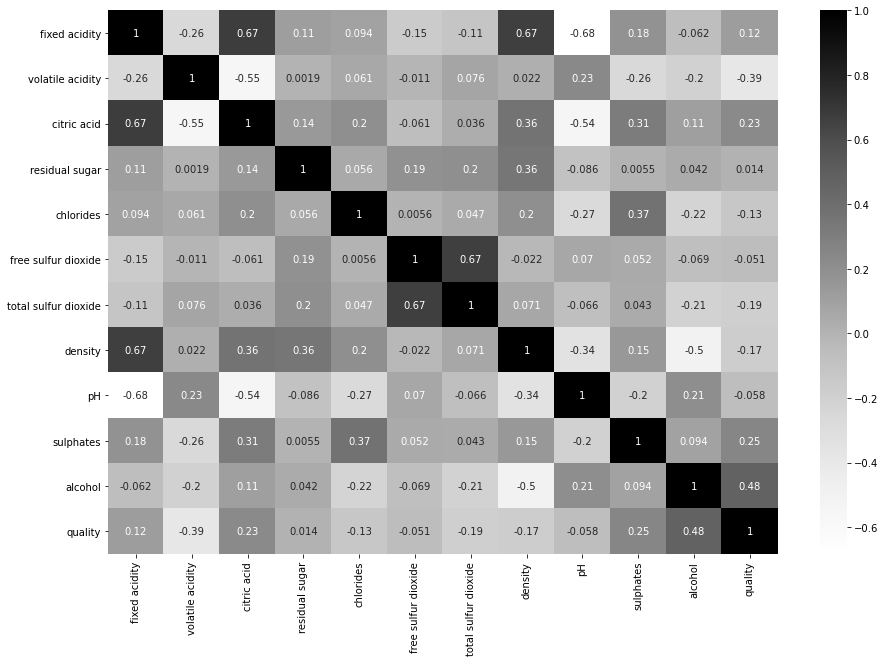

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='Greys')

Alcohol,sulphates,citric acid shows strong positive correlation with respect to quality whereas volatile acidity strong negative correlation and other features show little correlation with quality of wine be it positive or negative. Some features show strong correlation with each other which could be a problem for naive bayes and Logistic regression algorithms 

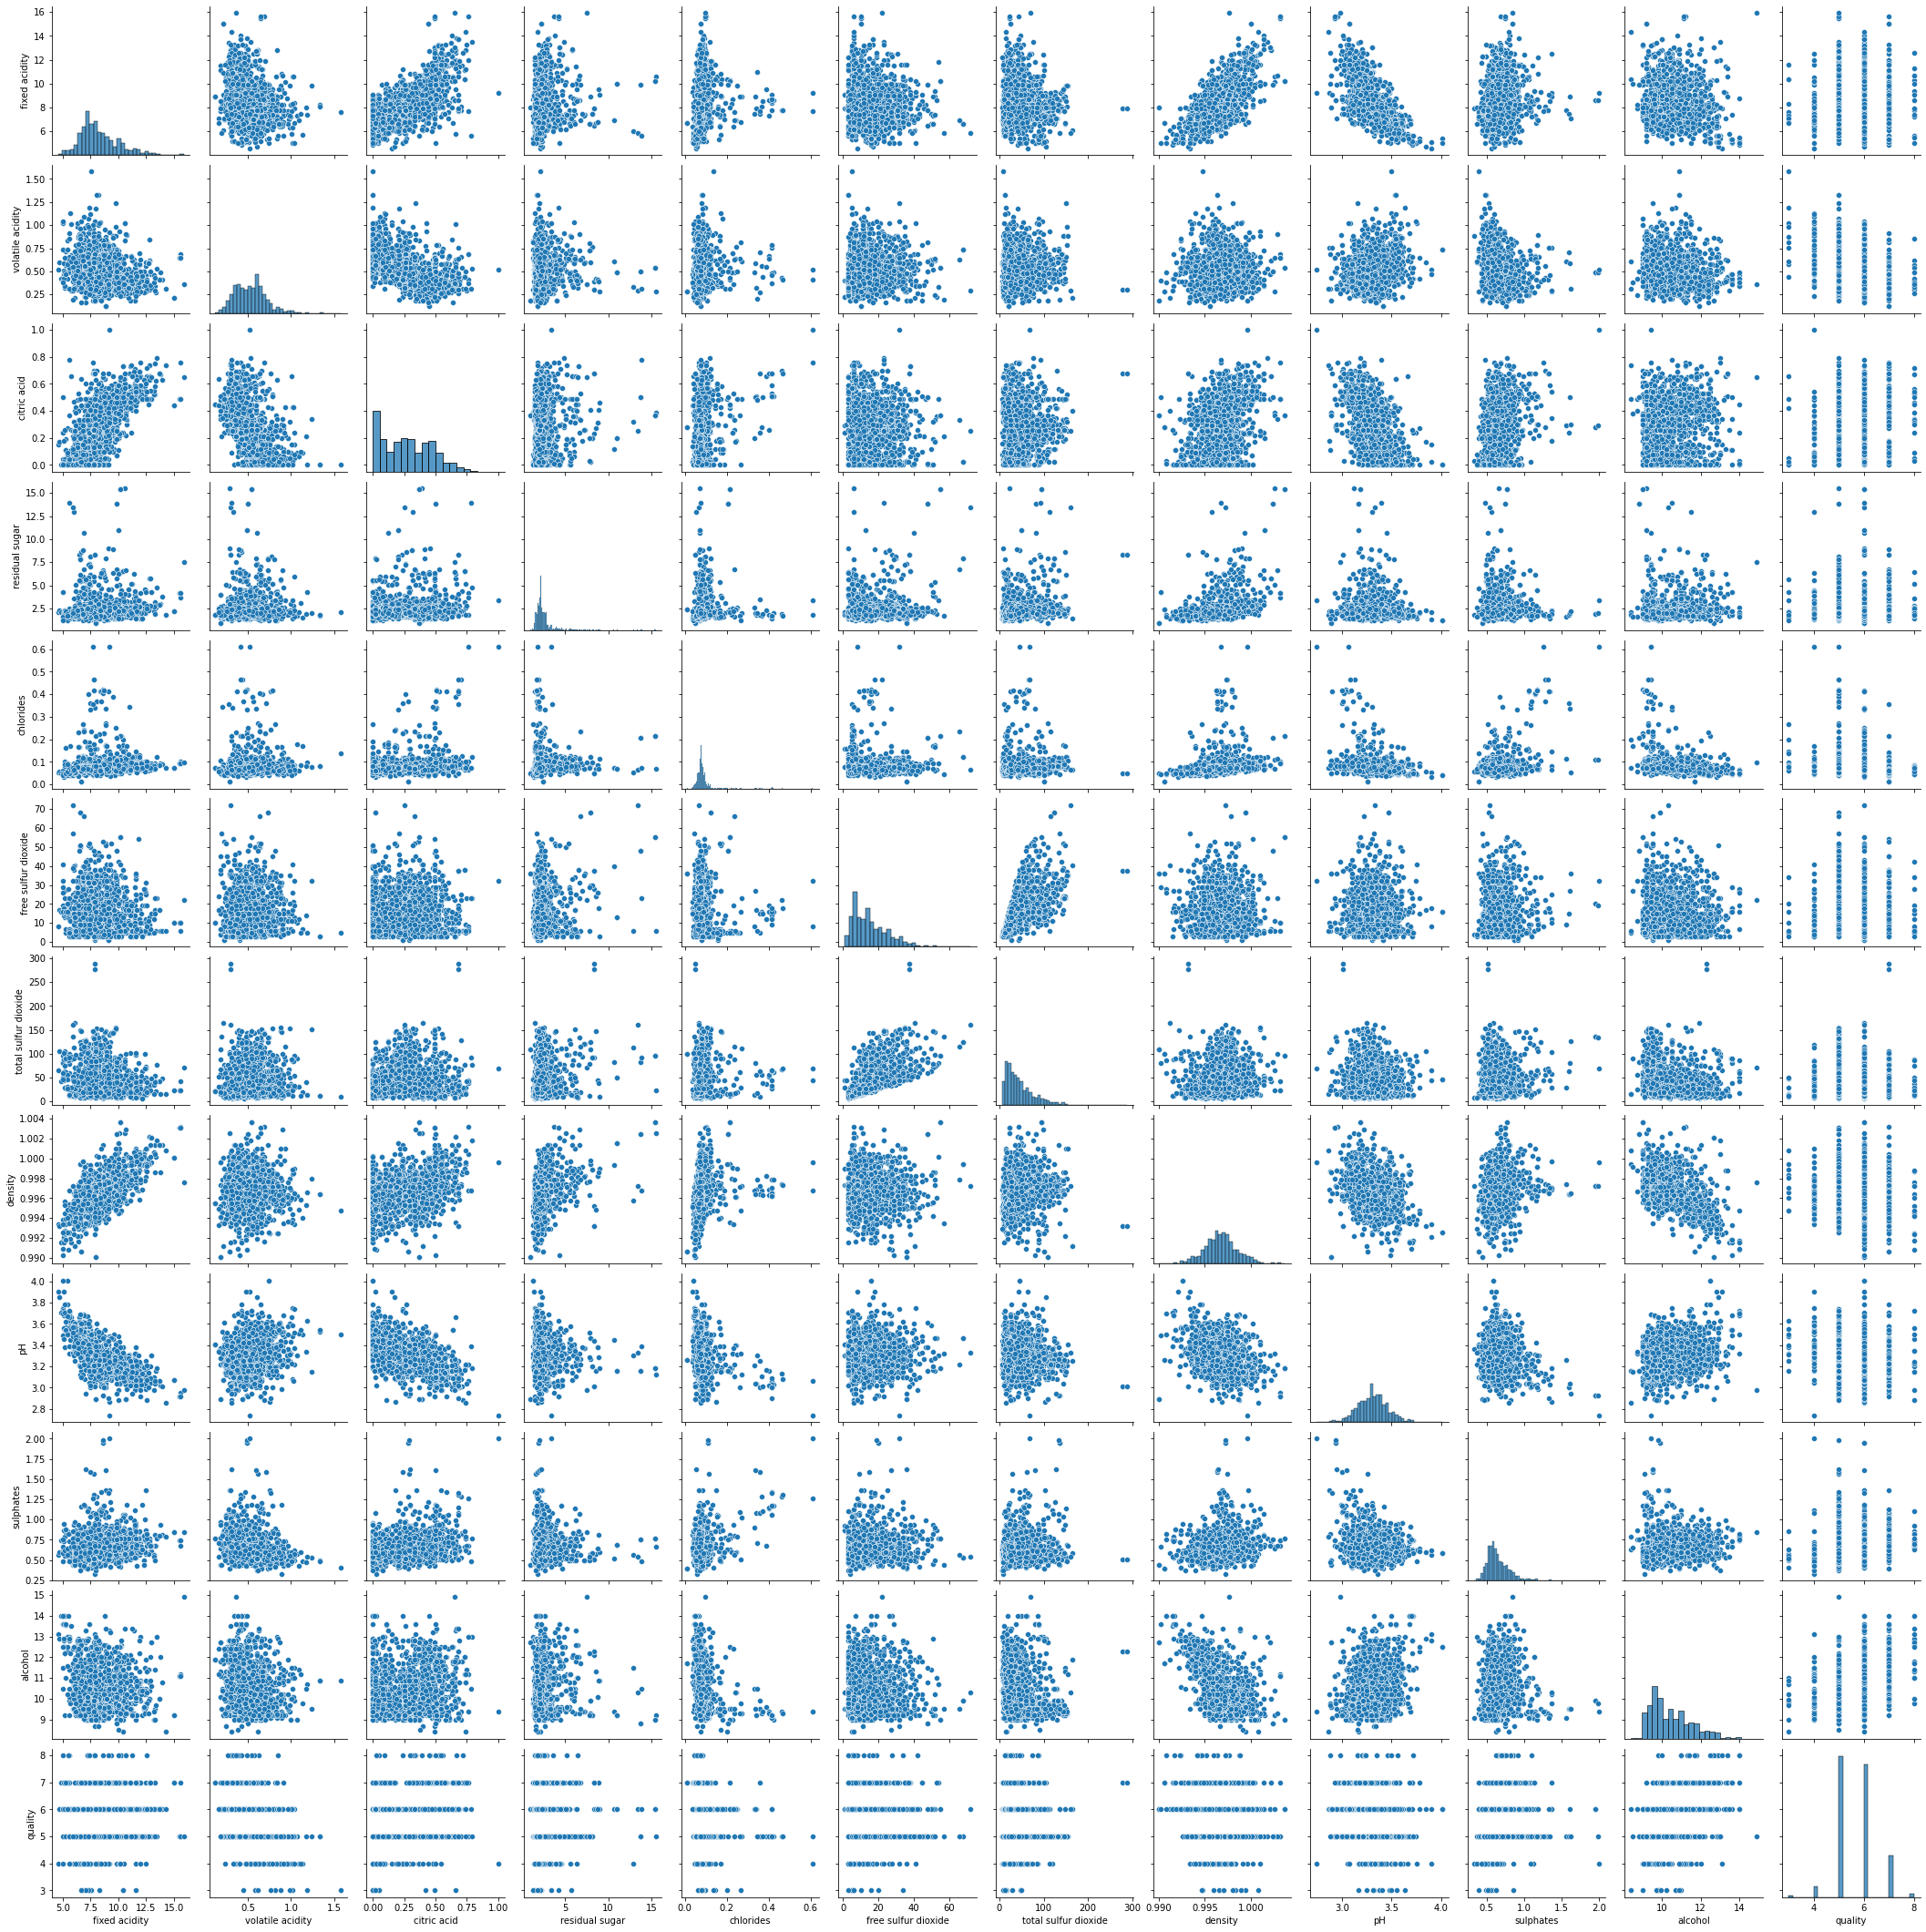

In [20]:
sns.pairplot(df)

For few features which show correlation with wine quality such as alcohol, density etc, most of the features alone cannot decide the quality of wine, no such relation can be found between those.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002041CCFCEE0>,
      dtype=object)

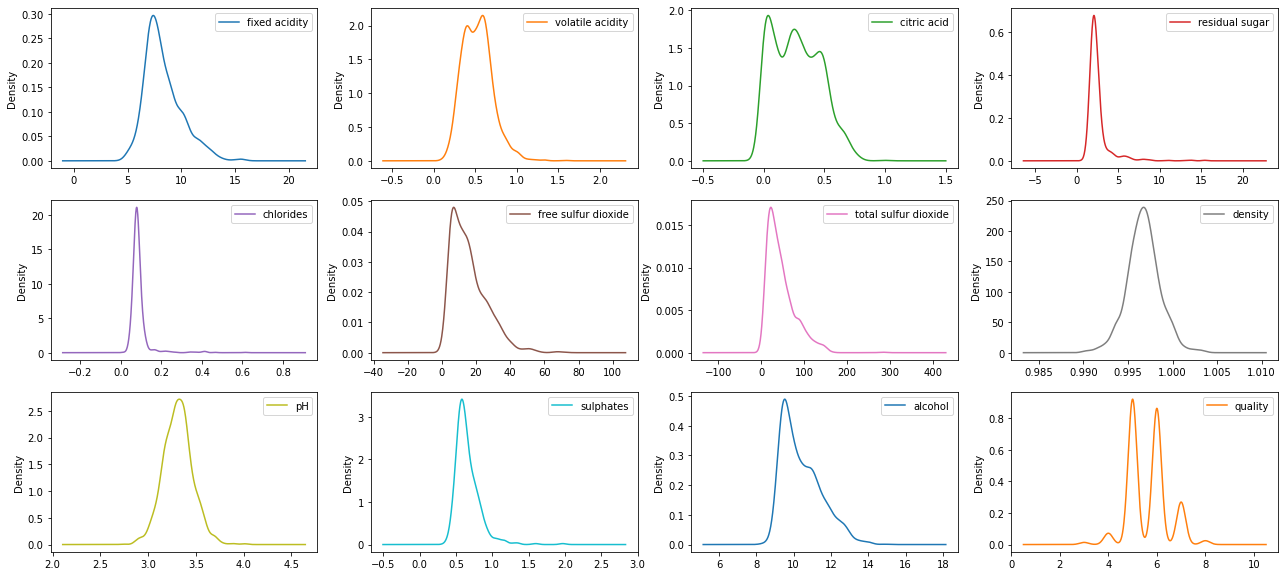

In [21]:
df.plot(kind='density',subplots=True,layout=(3,4),sharex=False,figsize=(22,10))

There is normal distribution of data in many features, distribution seems to be negative in some therefore, we cannot apply log transformation everywhere blindly. There is more density of values in citric acid, sulphur dioxide, density, alcohol, ph ehreas other features have high variance and there values are distributed

# Feature Engineering

In [22]:
from scipy.stats import zscore
def outlier(threshold,d):
    data=d.copy()
    z=np.abs(zscore(df))
    d=d[(z<threshold).all(axis=1)]
    return d

In [23]:
for thresh in np.arange(3,5,0.1):
    exp=outlier(thresh,df)
    loss=np.round((df.shape[0]-exp.shape[0])/df.shape[0]*100,2)
    print('Loss of data with threshold {} is {}'.format(np.round(thresh,2),loss))

Loss of data with threshold 3.0 is 9.26
Loss of data with threshold 3.1 is 8.26
Loss of data with threshold 3.2 is 7.75
Loss of data with threshold 3.3 is 6.69
Loss of data with threshold 3.4 is 5.63
Loss of data with threshold 3.5 is 5.19
Loss of data with threshold 3.6 is 5.0
Loss of data with threshold 3.7 is 4.75
Loss of data with threshold 3.8 is 4.57
Loss of data with threshold 3.9 is 4.13
Loss of data with threshold 4.0 is 3.88
Loss of data with threshold 4.1 is 3.81
Loss of data with threshold 4.2 is 3.38
Loss of data with threshold 4.3 is 3.38
Loss of data with threshold 4.4 is 3.25
Loss of data with threshold 4.5 is 3.0
Loss of data with threshold 4.6 is 2.75
Loss of data with threshold 4.7 is 2.75
Loss of data with threshold 4.8 is 2.69
Loss of data with threshold 4.9 is 2.69


Best threshold I can find is 3.3 with 6.7% of data loss.

In [24]:
print(df.shape)
df=outlier(3.3,df)
df.shape

(1599, 12)


(1492, 12)

In [25]:
x=df.iloc[:,:-1]
y=df['quality']

In [26]:
x.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [27]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [28]:
x.skew()

fixed acidity           0.857551
volatile acidity        0.433639
citric acid             0.294275
residual sugar          2.449342
chlorides               2.504745
free sulfur dioxide     0.910060
total sulfur dioxide    1.209495
density                 0.069212
pH                      0.142439
sulphates               1.016436
alcohol                 0.749501
dtype: float64

In [29]:
for i in x.columns:
    if np.abs(x[i].skew())>0.5 and i!='alcohol' and i!='residual sugar':
        x[i]=np.log(x[i])

In [30]:
x.skew()

fixed acidity           0.399838
volatile acidity        0.433639
citric acid             0.294275
residual sugar          2.449342
chlorides               0.016468
free sulfur dioxide    -0.289998
total sulfur dioxide   -0.085671
density                 0.069212
pH                      0.142439
sulphates               0.401936
alcohol                 0.749501
dtype: float64

In [31]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
x['alcohol']=pt.fit_transform(x['alcohol'].values.reshape(-1,1))
x['residual sugar']=pt.fit_transform(x['residual sugar'].values.reshape(-1,1))

In [32]:
x.skew()

fixed acidity           0.399838
volatile acidity        0.433639
citric acid             0.294275
residual sugar          0.001180
chlorides               0.016468
free sulfur dioxide    -0.289998
total sulfur dioxide   -0.085671
density                 0.069212
pH                      0.142439
sulphates               0.401936
alcohol                 0.108487
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002041F0E3F10>,
      dtype=object)

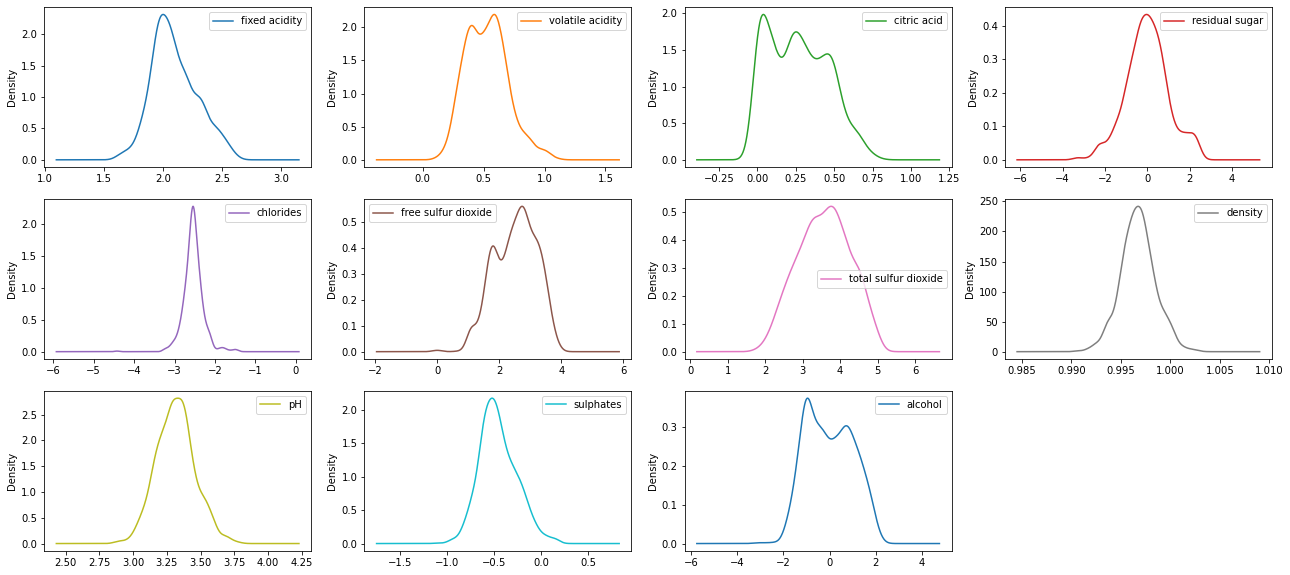

In [33]:
x.plot(kind='density',subplots=True,layout=(3,4),sharex=False,figsize=(22,10))

In [34]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x,y=smote.fit_resample(x,y)

In [35]:
y.value_counts()

7    633
5    633
3    633
8    633
6    633
4    633
Name: quality, dtype: int64

In [36]:
print(x.shape,y.shape)

(3798, 11) (3798,)


In [37]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()

In [38]:
xd=m.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)
x.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.380764          0.582915     0.000000        0.466029   0.615298   
1       0.431893          0.763819     0.000000        0.684789   0.700046   
2       0.431893          0.643216     0.050633        0.608232   0.678985   
3       0.783276          0.160804     0.708861        0.466029   0.610883   
4       0.380764          0.582915     0.000000        0.466029   0.615298   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.612955              0.535589  0.584490  0.700000   0.409644   
1             0.822816              0.745036  0.502857  0.355556   0.560038   
2             0.692238              0.678432  0.519184  0.422222   0.525088   
3             0.724232              0.710964  0.600816  0.311111   0.436826   
4             0.612955              0.535589  0.584490  0.700000   0.409644   

    alcohol  
0  0.382742  
1  0.493674  
2  0.493674  
3  0.493674  
4  0.382742

# Feature selection

##### Feature selection through chisquare test

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [40]:
selection = SelectKBest(score_func=chi2)
fit = selection.fit(x,y)

In [41]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['ingridients','Score']  #naming the dataframe columns
featureScores

ingridients       Score
0          fixed acidity   13.710411
1       volatile acidity  165.933541
2            citric acid  146.636781
3         residual sugar    0.806002
4              chlorides    5.795381
5    free sulfur dioxide   10.885425
6   total sulfur dioxide   41.554411
7                density   39.831075
8                     pH   26.719045
9              sulphates   56.237210
10               alcohol  127.523825

In [42]:
print(featureScores.nlargest(10,'Score'))  #print10 best features
feat=list(featureScores.nlargest(10,'Score')['ingridients'])

             ingridients       Score
1       volatile acidity  165.933541
2            citric acid  146.636781
10               alcohol  127.523825
9              sulphates   56.237210
6   total sulfur dioxide   41.554411
7                density   39.831075
8                     pH   26.719045
0          fixed acidity   13.710411
5    free sulfur dioxide   10.885425
4              chlorides    5.795381


In [43]:
xchi=pd.DataFrame()
for i in feat:
    xchi[i]=x[i]
xchi.head()   

volatile acidity  citric acid   alcohol  sulphates  total sulfur dioxide  \
0          0.582915     0.000000  0.382742   0.409644              0.535589   
1          0.763819     0.000000  0.493674   0.560038              0.745036   
2          0.643216     0.050633  0.493674   0.525088              0.678432   
3          0.160804     0.708861  0.493674   0.436826              0.710964   
4          0.582915     0.000000  0.382742   0.409644              0.535589   

    density        pH  fixed acidity  free sulfur dioxide  chlorides  
0  0.584490  0.700000       0.380764             0.612955   0.615298  
1  0.502857  0.355556       0.431893             0.822816   0.700046  
2  0.519184  0.422222       0.431893             0.692238   0.678985  
3  0.600816  0.311111       0.783276             0.724232   0.610883  
4  0.584490  0.700000       0.380764             0.612955   0.615298

We get xchi as our input features from the above selectkbest method using chi test

##### Feature selection using feature importance of extra trees regressor

In [44]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [45]:
print(model.feature_importances_)

[0.06535304 0.12543808 0.07584822 0.07506869 0.08193449 0.0716562
 0.0918377  0.09298468 0.07633163 0.1061043  0.13744297]


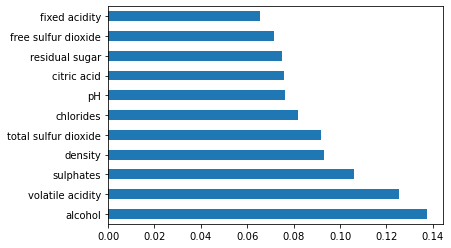

In [46]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

In [47]:
fi=list(feat_importances.nlargest(10).index)
fi

['alcohol',
 'volatile acidity',
 'sulphates',
 'density',
 'total sulfur dioxide',
 'chlorides',
 'pH',
 'citric acid',
 'residual sugar',
 'free sulfur dioxide']

In [48]:
xfi=pd.DataFrame()
for i in fi:
    xfi[i]=x[i]
xfi.head()   

alcohol  volatile acidity  sulphates   density  total sulfur dioxide  \
0  0.382742          0.582915   0.409644  0.584490              0.535589   
1  0.493674          0.763819   0.560038  0.502857              0.745036   
2  0.493674          0.643216   0.525088  0.519184              0.678432   
3  0.493674          0.160804   0.436826  0.600816              0.710964   
4  0.382742          0.582915   0.409644  0.584490              0.535589   

   chlorides        pH  citric acid  residual sugar  free sulfur dioxide  
0   0.615298  0.700000     0.000000        0.466029             0.612955  
1   0.700046  0.355556     0.000000        0.684789             0.822816  
2   0.678985  0.422222     0.050633        0.608232             0.692238  
3   0.610883  0.311111     0.708861        0.466029             0.724232  
4   0.615298  0.700000     0.000000        0.466029             0.612955

We get xfi as our another dataset using feature importance of extratrees classifier

##### Feature selection using pearson correlation method

In [49]:
xcor=pd.DataFrame()
for i in x.columns:
    if np.abs(y.corr(x[i]))>0.2:
        xcor[i]=x[i]

In [50]:
xcor.head()

volatile acidity  citric acid  chlorides   density        pH  sulphates  \
0          0.582915     0.000000   0.615298  0.584490  0.700000   0.409644   
1          0.763819     0.000000   0.700046  0.502857  0.355556   0.560038   
2          0.643216     0.050633   0.678985  0.519184  0.422222   0.525088   
3          0.160804     0.708861   0.610883  0.600816  0.311111   0.436826   
4          0.582915     0.000000   0.615298  0.584490  0.700000   0.409644   

    alcohol  
0  0.382742  
1  0.493674  
2  0.493674  
3  0.493674  
4  0.382742

We get xcor set of dependent features through correlation method

### Creating and testing different models

In [51]:
#Importing Classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [52]:
models=[KNeighborsClassifier(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),
       GradientBoostingClassifier(),XGBClassifier()]

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [54]:
from sklearn.model_selection import train_test_split,cross_val_score

In [55]:
#All the sets of datasets achieved by various feature selection method
xdata=[x,xchi,xfi,xcor]
names=['original dataset','Feature selection using Chi2','Feature selection using feature importance',
       'Feature selection using correlation']

In [56]:
#Method to find best random state
def randomstate(xlist):
    a=[]
    for i in xlist:
        maxx=0
        for j in range(1,201):
            xtrain,xtest,ytrain,ytest=train_test_split(i,y,test_size=0.25,random_state=j)
            m=DecisionTreeClassifier()
            m.fit(xtrain,ytrain)
            p=m.predict(xtest)
            acc=accuracy_score(p,ytest)
            if maxx<acc:
                maxx=acc
                k=j
        a.append(k)
    return a

In [57]:
#creating a list of best random states from all the xdata
beststates=randomstate(xdata)
beststates

[36, 100, 36, 65]

In [58]:
#Creates different models with different set of data
for  j,n in enumerate(xdata):
    print('---------------------------------------------{}---------------------------------------'.format(names[j]))
    xtrain,xtest,ytrain,ytest=train_test_split(n,y,test_size=0.25,random_state=beststates[j])
    for i in models:
        m=i
        m.fit(xtrain,ytrain)
        p=m.predict(xtest)
        print(i)
        print('Accuracy - {}%'.format(np.round(accuracy_score(p,ytest)*100,2)))
        #print('-------------------------------------------------')
        #print('Confusion Matrix')
        #print(confusion_matrix(p,ytest))
        #print('-------------------------------------------------')
        #print('Classification Report')
        #print(classification_report(p,ytest))
        print('-------------------------------------------------------------------------------------------------------')

---------------------------------------------original dataset---------------------------------------
KNeighborsClassifier()
Accuracy - 78.74%
-------------------------------------------------------------------------------------------------------
SVC()
Accuracy - 79.79%
-------------------------------------------------------------------------------------------------------
DecisionTreeClassifier()
Accuracy - 82.74%
-------------------------------------------------------------------------------------------------------
RandomForestClassifier()
Accuracy - 88.42%
-------------------------------------------------------------------------------------------------------
GradientBoostingClassifier()
Accuracy - 82.42%
-------------------------------------------------------------------------------------------------------
[14:19:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objectiv

###### Observations

1) From above analysis we find that feature selection using chi2 test we get maximum efficiency i.e. by dropping residual sugar column.

2) Random Forrest and xg boost algorithms work best for our problem

## Hyperparameter Tuning

In [59]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [60]:
xtrain,xtest,ytrain,ytest=train_test_split(xchi,y,test_size=0.25,random_state=174)

### Random forest

In [61]:
param_grid={'n_estimators':[400,500,700,900,1100],
            'criterion':['gini','entropty'],
           'max_features':['int','float','auto','log2'],
           'max_depth':[None,1,2,3,4,5,6,7,8,9,10]}

In [62]:
g=GridSearchCV(RandomForestClassifier(),param_grid,cv=5)

In [63]:
g.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropty'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['int', 'float', 'auto', 'log2'],
                         'n_estimators': [400, 500, 700, 900, 1100]})

In [64]:
g.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 500}

In [65]:
g.best_score_

0.8472679061449758

In [66]:
rf=RandomForestClassifier(n_estimators= 400, max_features='auto', criterion='gini',max_depth=None)
rf.fit(xtrain,ytrain)
p=rf.predict(xtest)
score=cross_val_score(rf,x,y,cv=5)
print('Accuracy',accuracy_score(p,ytest))
print('-------------------------------------------------')
print('Mean of Cross validation Score',score.mean())
print('-------------------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(p,ytest))
print('-------------------------------------------------')
print('Classification Report')
print(classification_report(p,ytest))
print('-------------------------------------------------')
#print('ROC-AUC score',roc_auc_score(ytest,rf.predict_proba(xtest)[:,1],multi_class='ovo'))

Accuracy 0.8926315789473684
-------------------------------------------------
Mean of Cross validation Score 0.8133309063171763
-------------------------------------------------
Confusion Matrix
[[152   0   3   0   0   0]
 [  0 148   8   3   1   0]
 [  0   6 130  27   4   0]
 [  0   2  20 106  10   0]
 [  0   0   1  13 145   0]
 [  0   0   0   2   2 167]]
-------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           3       1.00      0.98      0.99       155
           4       0.95      0.93      0.94       160
           5       0.80      0.78      0.79       167
           6       0.70      0.77      0.73       138
           7       0.90      0.91      0.90       159
           8       1.00      0.98      0.99       171

    accuracy                           0.89       950
   macro avg       0.89      0.89      0.89       950
weighted avg       0.90      0.89      0.89       950

---------------------------

### xgboost

In [67]:
params={
 "learning_rate"    : [0.001,0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 6, 8, 10, 12, 15, None],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [68]:
g=RandomizedSearchCV(XGBClassifier(verbosity=0),params,cv=5)

In [69]:
g.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                    

In [70]:
g.best_params_

{'min_child_weight': 1,
 'max_depth': None,
 'learning_rate': 0.2,
 'gamma': 0.0,
 'colsample_bytree': 0.5}

In [71]:
g.best_score_

0.8420078315296149

In [72]:
xg=XGBClassifier(min_child_weight=5,max_depth=None,learning_rate=0.3,gamma= 0.1,colsample_bytree= 0.7,verbosity=0)
xg.fit(xtrain,ytrain)
p=xg.predict(xtest)
score=cross_val_score(xg,x,y,cv=5)
print('Accuracy',accuracy_score(p,ytest))
print('-------------------------------------------------')
print('Mean of Cross validation Score',score.mean())
print('-------------------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(p,ytest))
print('-------------------------------------------------')
print('Classification Report')
print(classification_report(p,ytest))
print('-------------------------------------------------')
#print('ROC-AUC score',roc_auc_score(ytest,xg.predict_proba(xtest)[:,1],,multi_class='ovo'))

Accuracy 0.8705263157894737
-------------------------------------------------
Mean of Cross validation Score 0.8054299285763816
-------------------------------------------------
Confusion Matrix
[[151   1   1   0   0   0]
 [  0 142   8   3   0   0]
 [  1   8 126  26   2   0]
 [  0   5  26 108  19   2]
 [  0   0   1  12 136   1]
 [  0   0   0   2   5 164]]
-------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           3       0.99      0.99      0.99       153
           4       0.91      0.93      0.92       153
           5       0.78      0.77      0.78       163
           6       0.72      0.68      0.69       160
           7       0.84      0.91      0.87       150
           8       0.98      0.96      0.97       171

    accuracy                           0.87       950
   macro avg       0.87      0.87      0.87       950
weighted avg       0.87      0.87      0.87       950

---------------------------

##### Selecting the best model

Hence we ch0ose random forest as our best model

### Finalizing the best model

In [73]:
model=RandomForestClassifier(n_estimators= 400, max_features='auto', criterion='gini',max_depth=None)
model.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=400)

In [74]:
p=model.predict(xtest)
score=cross_val_score(model,x,y,cv=5)

### Evaluation Metrics

In [75]:
accuracy=accuracy_score(p,ytest)
confusion=confusion_matrix(p,ytest)
report=classification_report(p,ytest)
#aucroc=roc_auc_score(p,ytest)

In [76]:
print('Accuracy',accuracy)
print('----------------------------------------------')
print('Mean of Cross validation Score',score.mean())
print('----------------------------------------------')
print('Confusion Matrix')
print(confusion)
print('----------------------------------------------')
print('Classification Report')
print(report)
print('----------------------------------------------')
#print('ROC-AUC Score',aucroc)

Accuracy 0.8863157894736842
----------------------------------------------
Mean of Cross validation Score 0.812541085916372
----------------------------------------------
Confusion Matrix
[[152   0   3   0   0   0]
 [  0 150   8   3   1   0]
 [  0   4 131  30   5   0]
 [  0   2  19 100  12   0]
 [  0   0   1  15 142   0]
 [  0   0   0   3   2 167]]
----------------------------------------------
Classification Report
              precision    recall  f1-score   support

           3       1.00      0.98      0.99       155
           4       0.96      0.93      0.94       162
           5       0.81      0.77      0.79       170
           6       0.66      0.75      0.70       133
           7       0.88      0.90      0.89       158
           8       1.00      0.97      0.99       172

    accuracy                           0.89       950
   macro avg       0.88      0.88      0.88       950
weighted avg       0.89      0.89      0.89       950

-------------------------------------

### Saving the model

In [77]:
import joblib
joblib.dump(model,'wine.obj')

['wine.obj']

## Extra Exercise
Predicting if wine is good(quality>=7) or bad(quality<7)

In [78]:
x.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.380764          0.582915     0.000000        0.466029   0.615298   
1       0.431893          0.763819     0.000000        0.684789   0.700046   
2       0.431893          0.643216     0.050633        0.608232   0.678985   
3       0.783276          0.160804     0.708861        0.466029   0.610883   
4       0.380764          0.582915     0.000000        0.466029   0.615298   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.612955              0.535589  0.584490  0.700000   0.409644   
1             0.822816              0.745036  0.502857  0.355556   0.560038   
2             0.692238              0.678432  0.519184  0.422222   0.525088   
3             0.724232              0.710964  0.600816  0.311111   0.436826   
4             0.612955              0.535589  0.584490  0.700000   0.409644   

    alcohol  
0  0.382742  
1  0.493674  
2  0.493674  
3  0.493674  
4  0.382742

In [79]:
dfx=pd.concat([x,y],axis=1)
dfx.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.380764          0.582915     0.000000        0.466029   0.615298   
1       0.431893          0.763819     0.000000        0.684789   0.700046   
2       0.431893          0.643216     0.050633        0.608232   0.678985   
3       0.783276          0.160804     0.708861        0.466029   0.610883   
4       0.380764          0.582915     0.000000        0.466029   0.615298   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.612955              0.535589  0.584490  0.700000   0.409644   
1             0.822816              0.745036  0.502857  0.355556   0.560038   
2             0.692238              0.678432  0.519184  0.422222   0.525088   
3             0.724232              0.710964  0.600816  0.311111   0.436826   
4             0.612955              0.535589  0.584490  0.700000   0.409644   

    alcohol  quality  
0  0.382742        5  
1  0.493674        5  
2  0.493674        5  
3  0.493674        6  
4  0.382742        5

In [80]:
dfx['quality']=dfx['quality'].apply(lambda x:0 if x<=6 else 1)

In [81]:
xnew=dfx.iloc[:,:-1]
ynew=dfx.iloc[:,-1]
print(xnew.shape,ynew.shape)

(3798, 11) (3798,)


In [82]:
xnew.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.380764          0.582915     0.000000        0.466029   0.615298   
1       0.431893          0.763819     0.000000        0.684789   0.700046   
2       0.431893          0.643216     0.050633        0.608232   0.678985   
3       0.783276          0.160804     0.708861        0.466029   0.610883   
4       0.380764          0.582915     0.000000        0.466029   0.615298   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.612955              0.535589  0.584490  0.700000   0.409644   
1             0.822816              0.745036  0.502857  0.355556   0.560038   
2             0.692238              0.678432  0.519184  0.422222   0.525088   
3             0.724232              0.710964  0.600816  0.311111   0.436826   
4             0.612955              0.535589  0.584490  0.700000   0.409644   

    alcohol  
0  0.382742  
1  0.493674  
2  0.493674  
3  0.493674  
4  0.382742

In [83]:
ynew.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

In [84]:
ynew.value_counts()

0    2532
1    1266
Name: quality, dtype: int64

We just need to balance the dataset as the data is already cleaned and scaled

In [85]:
xnew,ynew=smote.fit_resample(xnew,ynew)
print(xnew.shape,ynew.shape)

(5064, 11) (5064,)


In [86]:
ynew.value_counts()

1    2532
0    2532
Name: quality, dtype: int64

In [87]:
xtrain,xtest,ytrain,ytest=train_test_split(xnew,ynew,test_size=0.25,random_state=7)

##### Hyperparameter tuning

In [88]:
g=GridSearchCV(RandomForestClassifier(),param_grid,cv=5)
g.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropty'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['int', 'float', 'auto', 'log2'],
                         'n_estimators': [400, 500, 700, 900, 1100]})

In [89]:
print(g.best_params_)
print(g.best_score_)

{'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 700}
0.9652472089314195


##### Creating the model

In [90]:
rf=RandomForestClassifier(criterion= 'gini', max_depth= None, max_features='auto', n_estimators=500)
rf.fit(xtrain,ytrain)
p=rf.predict(xtest)
score=cross_val_score(rf,xnew,ynew,cv=10)

In [91]:
print('Accuracy',accuracy_score(p,ytest))
print('-------------------------------------------------')
print('Mean of Cross validation Score',score.mean())
print('-------------------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(p,ytest))
print('-------------------------------------------------')
print('Classification Report')
print(classification_report(p,ytest))
print('-------------------------------------------------')
print('ROC-AUC score',roc_auc_score(ytest,rf.predict_proba(xtest)[:,1]))

Accuracy 0.976303317535545
-------------------------------------------------
Mean of Cross validation Score 0.9599449602794085
-------------------------------------------------
Confusion Matrix
[[607   9]
 [ 21 629]]
-------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       616
           1       0.99      0.97      0.98       650

    accuracy                           0.98      1266
   macro avg       0.98      0.98      0.98      1266
weighted avg       0.98      0.98      0.98      1266

-------------------------------------------------
ROC-AUC score 0.9979558932172594


### Saving the model

In [92]:
joblib.dump(rf,'goodbad.obj')

['goodbad.obj']